In [15]:
import webMining as wm
from IPython.core.display import display, HTML
from tabulate import tabulate
from matplotlib import pyplot as plt
import requests
import numpy as np

Retrieve HTML document

In [16]:
query = 'concertina+dupla+30cm+clipada'
url = 'https://www.google.com/search?nord=1&tbm=shop&sxsrf=ALeKk021SiG0jK8P5QFwMwEqTTzTaLSJzw%3A1592931029540&source=hp&ei=1TLyXsOJHpqj5OUPhpau4A0&q='+query+'&oq='+query+'&gs_lcp=Cgtwcm9kdWN0cy1jYxADMgQIIxAnMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAOgcIIxDqAhAnUNcxWKk3YLY9aAFwAHgAgAFyiAHhBpIBAzAuOJgBAKABAaoBD3Byb2R1Y3RzLWNjLXdperABCg&sclient=products-cc&ved=0ahUKEwiDyKjBspjqAhWaEbkGHQaLC9wQ4dUDCAc&uact=5' 
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://www.google.com/',
    'Connection': 'keep-alive',
    'Cookie': 'CGIC=Ikp0ZXh0L2h0bWwsYXBwbGljYXRpb24veGh0bWwreG1sLGFwcGxpY2F0aW9uL3htbDtxPTAuOSxpbWFnZS93ZWJwLCovKjtxPTAuOA; NID=204=g5k0DQlZKLTdLr2eD81V0cBic7FoycSof8bAgCMupaGwWO-cn-aDp4NUCNcHkvob_dhAbeN494eviqwrSCfwhQDQq_d-K4HTG-YNx2lF8KG8VIk6Yo2a7c3Pw5HotilTZgFSU8VD0uKVW8AV690h73WIiDIcfNVwDYelsvHet_n3khOjpi6XfQl0CObNAEM_f8Hm7OwWc6un1hNiaTSC2W__Y9roxCVOUOpPGvAiQgoBNL2k5G_H51ZyUiTKZRsH4QUu-MOLeMLsUtr5jwUVhZbGX4xfCzos-5uBgg; SID=xQcO_AUE9k37wpaevy5EK5x-zYouKXZoIrNPNOUA6FRikzN8XkHxgCwnV5Fzza3RX_3U_Q.; HSID=AmrflQdOkBZnypTpP; SSID=AnGRjrMyz8shzmiN-; APISID=gikUssmL2DgWeE-G/AGmE_sScY4sR1j7Gi; SAPISID=rEtgdwZ7oEheKA_J/AnzdQ-CXLl9P_DRxl; ANID=AHWqTUmOvuytiAZ-RiEMDbSXk1liOmiVXsC3K6j8wTAEsxXncb8Naetqd35RHH5u; SIDCC=AJi4QfH7YFZXPoNzhwKuKu3wXev3h6HvD9qbfqDB0-6PoOq2RkwFgUHu3oxgm8LCqqtm7aWDH_-J; SEARCH_SAMESITE=CgQI_48B; __Secure-3PSID=xQcO_AUE9k37wpaevy5EK5x-zYouKXZoIrNPNOUA6FRikzN8DoN4DUANadKjm3gWjbWkKQ.; __Secure-3PAPISID=rEtgdwZ7oEheKA_J/AnzdQ-CXLl9P_DRxl; __Secure-HSID=AmrflQdOkBZnypTpP; __Secure-SSID=AnGRjrMyz8shzmiN-; __Secure-APISID=gikUssmL2DgWeE-G/AGmE_sScY4sR1j7Gi; 1P_JAR=2020-06-23-16; OTZ=5502067_68_64_73560_68_416340; DV=k7tykpHOCQdJUOnslcXBzjs-r2ohLheAAP7r7W9LEAYAANDMM2lHtAn8AAIAAJSWJz2C-gppkwAAAA',
    'Upgrade-Insecure-Requests': '1',
    'TE': 'Trailers'}
#payload = ''
#response = requests.post(url, data=payload, headers=headers)
response = requests.get(url, headers=headers)

Instantiate DOM tree and extractor

In [17]:
#doc = wm.DOM('test.html')
f = open('test.html', 'w')
f.write(response.text)
f.close()
doc = wm.DOM(url, response.text)
dsre = wm.DSRE()

Extract

In [26]:
dsre.setUseFourier(True) # False = Lazy FFT (faster), True = Full FFT
dsre.extract(doc)

Iterate over the extracted regions:
    - content: True/False;
    - sequence: region's subsequence;
    - transform: region's Fourier Transform;
    - table: extracted records (rows x cols);
    - rows: number of records.

In [27]:
regions = []
for reg in range(0, dsre.regionCount()):
    region = dict()
    dr = dsre.getDataRegion(reg)
    region['content'] = dr.isContent()
    region['sequence'] = dr.getSequence()
    region['transform'] = dr.getTransform()
    region['table'] = dr.getTable()
    region['rows'] = len(region['table'])
    regions.append(region)

Displays a table with the results of each region

In [28]:
content_string = ['noise', 'content']
for i, region in enumerate(regions):
    display('Region #' + str(i) + ' - ' + content_string[region['content']] + ', ' + str(region['rows']) + ' records')
    display(tabulate(region['table'], tablefmt='html'))

'Region #0 - content, 19 records'

Cerca Para Muro Concertina + Kit Completo 30 Cm (50 Metros),"R$ 325,00.","R$ 325,00",Mercado Livre,"<img class=TL92Hc c17 data-deferred=1 id=srpresultimg_15432729937379740150_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,,,,,ATENÇÃO: Este anúncio não faz parte da promoção de Frete Grátis do Mercado Livre! Consulte o valor do frete utilizando o campo ...,,,,,,,,,,
Cerca Concertina Dupla Clipada 30 Cm ( 32 Metros ) + Kit,"R$ 384,00.","R$ 384,00",Mercado Livre,"<img class=TL92Hc c17 data-deferred=1 id=srpresultimg_12167242108921507559_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,,,,,ATENÇÃO Este anúncio não faz parte da promoção de Frete Grátis do Mercado Livre! Consulte o valor do frete utilizando o campo ...,,,,,,,,,,
Concertina Dupla Clipada 30cm,"R$ 244,64.","R$ 244,64",Americanas.com,"<img class=TL92Hc c17 data-deferred=1 id=srpresultimg_10936643656920928815_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,,Concertina,,,é possível proteger seu imóvel contra invasões ...,Procurando por soluções para segurança residencial Com a Cerca,,,,,,,,,
Kit 30 Metros Concertina Mega Forte 30cm Preço Imbatível,"R$ 249,17.","R$ 249,17",Mercado Livre,"<img class=TL92Hc c17 data-deferred=1 id=srpresultimg_17753290968974475099_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,Comparar preços de 5+ lojas,,,,,"ATENÇÃO: Para não exceder o limite de peso dos Correios, compre até 01 kit por etiqueta. Se ultrapassar esse limite, será ...",,,,Outras opções de tamanho:,45 cm,,,(R$ 300),
Cerca Concertina Dupla Clipada 30 Cm ( Preço Metro ) + Kit,"R$ 12,00.","R$ 12,00",Mercado Livre,"<img class=TL92Hc c18 data-deferred=1 id=srpresultimg_3647961496829011206_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,,,,,ATENÇÃO: ANÚNCIO COM PREÇO POR METRO DE INSTALAÇÃO! Este anúncio não faz parte da promoção de Frete Grátis do Mercado Livre ...,,,,,,,,,,
"Cerca Concertina Dupla Clipada - Ouriço com 300mm de diâmetro, Rende a","R$ 79,90.","R$ 79,90",Magazine Luiza,"<img class=TL92Hc c17 data-deferred=1 id=srpresultimg_1394840484427736746_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,,,,,,,,,,,,,,,
Concertina Dupla Clipada Ouriço 30 Cm ( Preço Metro ) + Kit,"R$ 12,00.","R$ 12,00",Mercado Livre,"<img class=TL92Hc c18 data-deferred=1 id=srpresultimg_11492295768316522824_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,,,,,ATENÇÃO: ANÚNCIO COM PREÇO POR METRO DE INSTALAÇÃO! Este anúncio não faz parte da promoção de Frete Grátis do Mercado Livre ...,,,,,,,,,,
Cerca Concertina Dupla Clipada 30 Cm ( 15 Metros ) + Kit,"R$ 180,00.","R$ 180,00",Mercado Livre,"<img class=TL92Hc c17 data-deferred=1 id=srpresultimg_16763421219706037189_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,,CONCERTINA DUPLA CLIPADA 30 CM,,,Este anúncio não faz parte da promoção de Frete Grátis do Mercado Livre! Consulte o valor do ...,,,,,,,,,,
Concertina 10m x 30cm,"R$ 51,20.","R$ 51,20",Casa das Cercas,"<img class=TL92Hc c17 data-deferred=1 id=srpresultimg_12610230562079748529_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,,Concertina,Concertina,,"é ideal para se utilizar na proteção de muros, perímetros ou alambrados . Se trata de uma ...",ou Cerca,A,,,,,,,,
Cerca Concertina Dupla Clipada 45 Cm + Kit 30 Metros,"R$ 290,00.","R$ 290,00",Mercado Livre,"<img class=TL92Hc c17 data-deferred=1 id=srpresultimg_15578400942217067435_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",,,,,,,"Atenção: Para não exceder o limite de peso dos Correios, compre apenas 01 kit por pedido. Se ultrapassar esse limite, será ...",,,,,,,,,,
Concertina Dupla Clipad

Plot the sequence of the document and the subsequence+transform of each region

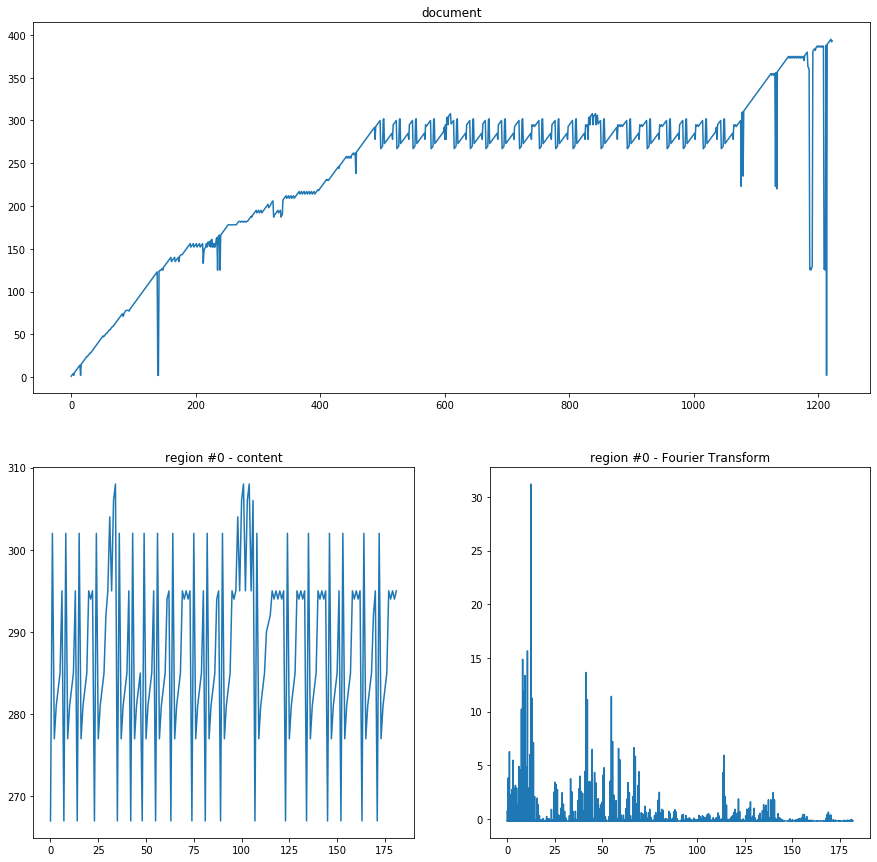

In [29]:
rows = len(regions) + 1
plt.figure(figsize=(15,15))
plt.subplot(rows, 1, 1)
plt.title('document')
plt.plot(dsre.getSequence())
for i, region in enumerate(regions):
    plt.subplot(rows, 2, (i+1)*2 + 1)
    plt.title('region #' + str(i) + ' - ' + content_string[region['content']])
    plt.plot(region['sequence'])
    plt.subplot(rows, 2, (i+1)*2 + 2)
    plt.title('region #' + str(i) + ' - Fourier Transform')
    transform_len = len(region['transform'])//2
    plt.plot(
        np.linspace(0, len(region['sequence']), transform_len), 
        region['transform'][0:transform_len])